<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#7.1-전체-구조" data-toc-modified-id="7.1-전체-구조-1">7.1 전체 구조</a></span></li><li><span><a href="#7.2-합성곱-계층" data-toc-modified-id="7.2-합성곱-계층-2">7.2 합성곱 계층</a></span><ul class="toc-item"><li><span><a href="#7.2.1-완전연결-계층의-문제점" data-toc-modified-id="7.2.1-완전연결-계층의-문제점-2.1">7.2.1 완전연결 계층의 문제점</a></span></li><li><span><a href="#7.2.2-합성곱-연산" data-toc-modified-id="7.2.2-합성곱-연산-2.2">7.2.2 합성곱 연산</a></span></li><li><span><a href="#7.2.3-패딩" data-toc-modified-id="7.2.3-패딩-2.3">7.2.3 패딩</a></span></li><li><span><a href="#7.2.4-스트라이드" data-toc-modified-id="7.2.4-스트라이드-2.4">7.2.4 스트라이드</a></span></li><li><span><a href="#7.2.5-3차원-데이터의-합성곱-연산" data-toc-modified-id="7.2.5-3차원-데이터의-합성곱-연산-2.5">7.2.5 3차원 데이터의 합성곱 연산</a></span></li><li><span><a href="#7.2.6-블록으로-생각하기" data-toc-modified-id="7.2.6-블록으로-생각하기-2.6">7.2.6 블록으로 생각하기</a></span></li><li><span><a href="#7.2.7-배치-처리" data-toc-modified-id="7.2.7-배치-처리-2.7">7.2.7 배치 처리</a></span></li></ul></li><li><span><a href="#7.3-풀링-계층" data-toc-modified-id="7.3-풀링-계층-3">7.3 풀링 계층</a></span><ul class="toc-item"><li><span><a href="#7.3.1-풀링-계층의-특징" data-toc-modified-id="7.3.1-풀링-계층의-특징-3.1">7.3.1 풀링 계층의 특징</a></span></li></ul></li><li><span><a href="#7.4-합성곱/풀링-계층-구현하기" data-toc-modified-id="7.4-합성곱/풀링-계층-구현하기-4">7.4 합성곱/풀링 계층 구현하기</a></span><ul class="toc-item"><li><span><a href="#7.4.1-4차원-배열" data-toc-modified-id="7.4.1-4차원-배열-4.1">7.4.1 4차원 배열</a></span></li><li><span><a href="#7.4.2-im2col로-데이터-전개하기" data-toc-modified-id="7.4.2-im2col로-데이터-전개하기-4.2">7.4.2 im2col로 데이터 전개하기</a></span></li><li><span><a href="#7.4.3-합성곱-계층-구현하기" data-toc-modified-id="7.4.3-합성곱-계층-구현하기-4.3">7.4.3 합성곱 계층 구현하기</a></span></li><li><span><a href="#7.4.4-풀링-계층-구현하기" data-toc-modified-id="7.4.4-풀링-계층-구현하기-4.4">7.4.4 풀링 계층 구현하기</a></span></li></ul></li><li><span><a href="#7.5-CNN-구현하기" data-toc-modified-id="7.5-CNN-구현하기-5">7.5 CNN 구현하기</a></span></li></ul></div>

이번 장의 주제는 **합성곱 신경망(Convolutional Neural Network, CNN)**이다. CNN은 이미지 인식과 음성 인식 등 다양한 곳에서 사용되는데, 특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 다 CNN을 기초로 한다.

# 7.1 전체 구조
CNN도 지금까지 본 신경망과 같이 레고 블록처럼 계층을 조합하여 만들 수 있다. 다만, **합성곱 계층**과 **풀링 계층**이 새롭게 등장한다. 이번 절에서는 이 계층들을 어떻게 조합하여 CNN을 만드는지 살펴본다.<br><br>
지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있었다. 이를 **완전연결**이라고 하며, 완전히 연결된 계층을 **Affine 계층**이라는 이름으로 구현하였다. 이 Affine 계층을 사용하면, 가령 층이 5개인 완전연결 신경망은 다음과 같이 구현할 수 있다. <br><br>

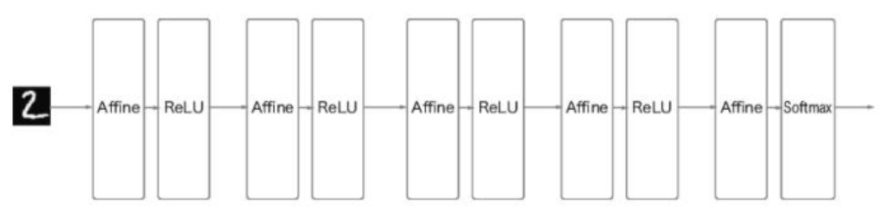

그림과 같이 완전연결 신경망은 Affine 계층 뒤에 활성화 함수를 갖는 ReLU 계층 (혹은 Sigmoid 계층)이 이어진다. 이 그림에서는 Affine-ReLU 조합이 4개가 쌓였고, 마지막 5번째 층은 Affine 계층에 이어 소프트맥스 계층에서 최종 결과(확률)를 출력한다.<br><br>
그럼 CNN의 구조는 어떻게 다를까?

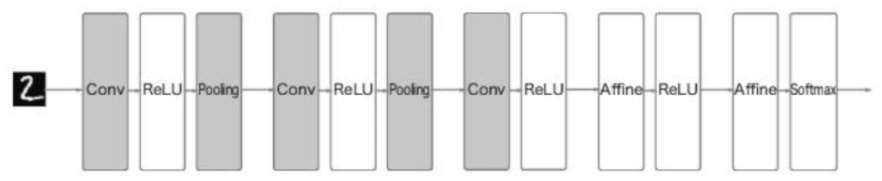

그림과 같이 CNN에서는 새로운 '합성곱 계층(Conv)'과 '풀링 계층(Pooling)'이 추가된다. CNN의 계층은 'Conv-ReLU-(Pooling)' 흐름으로 연결된다. (풀링 계층은 생략하기도 한다.)<br><br>
CNN에서 주목할 또 다른 점은 출력에 가까운 층에서는 지금까지의 'Affine-ReLU' 구성을 사용할 수 있다는 것이다. 또, 마지막 출력 계층에서는 'Affine-Softmax' 조합을 그대로 사용한다. 이상은 일반적인 CNN에서 흔히 볼 수 있는 구성이다.

# 7.2 합성곱 계층
CNN에서는 **패딩, 스트라이드** 등 CNN 고유의 용어가 등장한다. 또, 각 계층 사이에는 3차원 데이터같이 입체적인 데이터가 흐른다는 점에서 완전연결 신경망과 다르다.

## 7.2.1 완전연결 계층의 문제점
지금까지 본 완전연결 신경망에서는 완전연결 계층(Affine 계층)을 사용하였다. 완전연결 계층에서는 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있다.<br><br>
완전연결 계층의 문제점은 무엇일까? 바로 '데이터의 형상이 무시'된다는 사실이다. 입력 데이터가 이미지인 경우를 예로 들면, 이미지는 통상 세로, 가로, 채널(색상)로 구성된 3차원 데이터이다. 그러나 완전연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 평탄화해줘야 한다. <br><br>
이미지는 3차원 형상이며, 이 형상에는 공간적 정보가 담겨 있다. 예를 들어 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀끼리는 별 연관이 없는 등, 3차원 속에서 의미를 갖는 본질적인 패턴이 숨어 있을 것이다. 그러나 완전연결 계층은 형상을 무시하고 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 형상에 담긴 정보를 살릴 수 없다.<br><br>
한편, 합성곱 계층은 형상을 유지한다. 이미지도 3차원 데이터로 입력받으며, 마찬가지로 다음 계층에도 3차원 데이터로 전달한다. 그래서 CNN에서는 이미지처럼 형상을 가진 데이터를 제대로 이해할 가능성이 있는 것이다.<br><br>
CNN에서는 합성곱 계층의 입출력 데이터를 **'특징 맵'** 이라고도 한다. 합성곱 계층의 입력 데이터를 **입력 특징 맵**, 출력 데이터를 **출력 특징 맵**이라고 하는 식이다. 

## 7.2.2 합성곱 연산
합성곱 계층에서의 **합성곱 연산**을 처리한다. 합성곱 연산은 이미지 처리에서 말하는 **필터 연산**에 해당한다.<br><br>
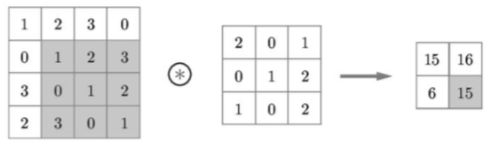<br><br>
그림과 같이 합성곱 연산은 입력 데이터에 필터를 적용한다. 이 예에서 입력 데이터는 세로, 가로 방향의 형상을 가졌고, 필터 역시 세로, 가로 방향의 차원을 갖는다. 데이터와 필터의 형상을 (높이, 너비)로 표기하며, 이 예에서는 입력은 (4, 4), 필터는 (3, 3), 출력은 (2, 2)가 된다. 문헌에 따라 필터를 **커널**이라 칭하기도 한다. 

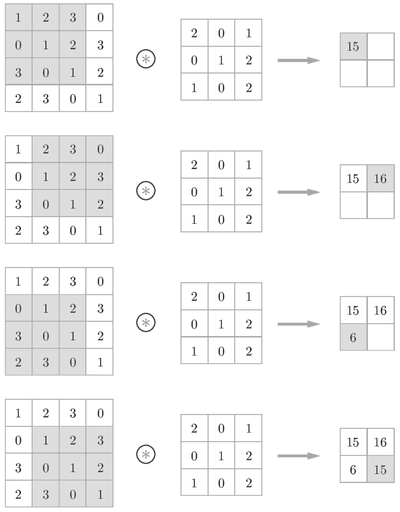

합성곱 연산은 필터의 **윈도우**를 일정 간격으로 이동해가며 입력 데이터에 적용한다. 여기에서 말하는 윈도우는 그림의 회색 3 X 3 부분을 가리킨다. 이 그림에서 보듯 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구한다. (이 계산을 **단일 곱셈-누산**이라 한다.) 그리고 그 결과를 출력의 해당 장소에 저장한다. 이 과정을 모든 장소에서 수행하면 합성곱 연산의 출력이 완성된다. 

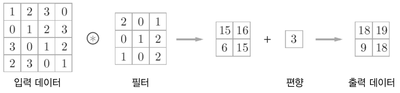

## 7.2.3 패딩
합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(예컨대 0)으로 채우기도 한다. 이를 **패딩**이라 하며, 합성곱 연산에서 자주 이용하는 기법이다.

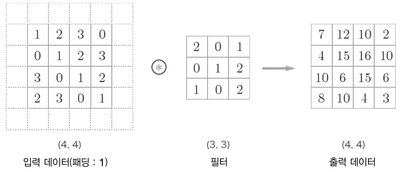

예를 들어 위의 그림은 (4, 4)크기의 입력 데이터에 폭이 1인 패딩을 적용한 모습이다. 폭 1짜리 패딩이라 하면 입력 데이터 사방 1픽셀을 특정 값으로 채우는 것이다.<br><br>
그림과 같이 처음에 크기가 (4, 4)인 입력 데이터에 패딩이 추가되어 (6, 6)이 된다. 이 입력에 (3, 3) 크기의 필터를 걸면 (4, 4) 크기의 출력 데이터가 생성된다. 이 예에서는 패딩을 1로 설정했지만, 2나 3 등 원하는 정수로 설정할 수 있다. 만약 패딩을 2로 설정하면 입력 데이터의 크기는(8, 8)이 되고, 3으로 설정하면 (10, 10)이 된다.

> 패딩은 주로 출력 크기를 조정할 목적으로 사용한다. 예를 들어 (4, 4) 입력 데이터에 (3, 3) 필터를 적용하면 출력은 (2, 2)가 되어, 입력보다 2만큼 줄어든다. 이는 합성곱 연산을 몇 번이나 되풀이하는 심층 신경망에서는 문제가 될 수 있습니다. 합성곱 연산을 거칠 때마다 크기가 작아지면 어느 시점에서는 출력 크기가 1이 되어버린다. 이러한 사태를 막기 위해 패딩을 사용한다. 앞에 예에서는 패딩의 폭을 1로 설정하니 (4, 4) 입력에 대한 출력이 같은 크기인 (4, 4)로 유지되었다. 한 마디로 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있다.

## 7.2.4 스트라이드
필터를 적용하는 위치의 간격을 **스트라이드**라고 한다. 지금까지 본 예는 모두 스트라이드가 1이었지만, 예를 들어 스트라이드를 2로 하면 필터를 적용하는 윈도우가 두 칸씩 이동한다.

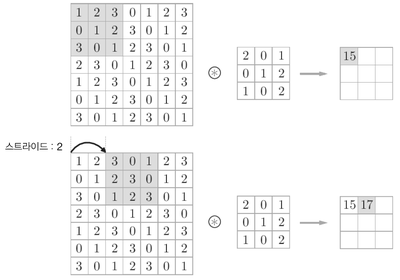

그림에서는 크기가 (7, 7)인 입력 데이터에 스트라이드를 2로 설정한 필터를 적용한다. 이처럼 스트라이드는 필터를 적용하는 간격을 지정한다.<br><br>
그런데 스트라이드를 2로 하니 출력은 (3, 3)이 된다. 이처럼 스트라이드를 키우면 출력 크기는 작아진다. 한편, 패딩을 크게 하면 출력 크기가 커진다. 이러한 관계를 수식화하면 다음과 같다.<br><br>
입력 크기를 (H, W), 필터 크기를 (FH, FW), 출력 크기를 (OH, OW), 패딩을 P, 스트라이드를 S라 하면, 출력 크기는 다음 식으로 계산한다.<br><br>
$$ OH = \frac{H + 2P -FH}{S} + 1 $$  
$$ OW = \frac{W + 2P - FW}{S} + 1 $$

---

**예 1 : 입력 : (4, 4), 패딩 : 1, 스트라이드 : 1, 필터 (3, 3)**
$$ OH = \frac {4 + 2 * 1  - 3}{1} + 1 = 4 $$  
$$ OW = \frac {4 + 2 * 1 - 3}{1} + 1 = 4 $$

**예 2 : 입력(28, 31), 패딩 : 2, 스트라이드 : 3, 필터 : (5, 5)**
$$ OH = \frac {28 + 2 * 2 - 5}{3} + 1 = 10 $$  
$$ OW = \frac {31 + 2 * 2 - 5}{3} + 1 = 11 $$

---

이상의 예에서 처럼 단순히 값을 대입하기만 하면 출력 크기를 구할 수 있다. 단, 식의 $ \frac{H + 2P -FH}{S}$ 와 $\frac{W + 2P - FW}{S}$가 정수로 나눠떨어지는 값이어야 한다는 점에 주의해야 한다. 출력 크기가 정수가 아니면 오류를 내는 등의 대응을 해줘야 한다. 덧붙여서 딥러닝 프레임워크 중에는 값이 딱 나눠떨어지지 않을 때는 가장 가까운 정수로 반올림하는 등, 특별히 에러를 내지 않고 진행하도록 구현하는 경우도 있다.

## 7.2.5 3차원 데이터의 합성곱 연산
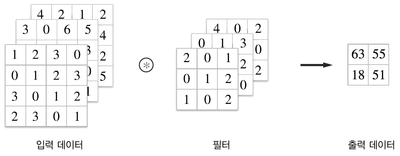

위 그림은 3차원 데이터의 합성곱 연산 예이다. 그리고 다음 그림은 계산 순서이다.

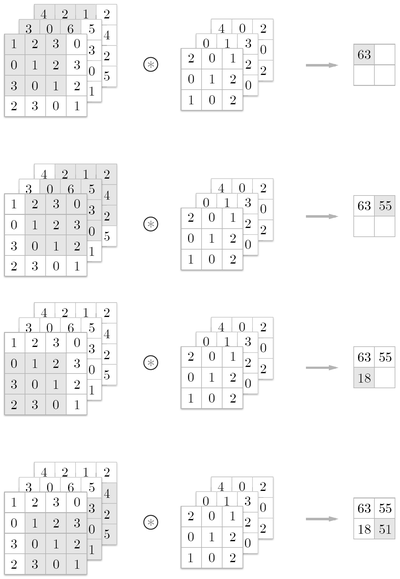

2차원일 때와 비교하면, 길이 방향(채널 방향)으로 특징 맵이 늘어났다. 채널 쪽으로 특징 맵이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻는다. <br><br>
3차원의 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다는 것이다. 이 예에서는 모두 3개로 일치한다. 한편, 필터 자체의 크기는 원하는 값으로 설정할 수 있다. (단, 모든 채널의 필터가 같은 크기여야 한다). 이 예에서는 필터의 크기가 (3, 3)이지만, (2, 2)나 (1, 1) 또는 (5, 5)등으로 설정해도 되는 것이다. **필터의 채널 수는 입력 데이터의 채널 수와 같도록 설정해야 한다.**

## 7.2.6 블록으로 생각하기
3차원의 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉽다. 블록은 다음 그림과 같은 3차원 직육면체이다.

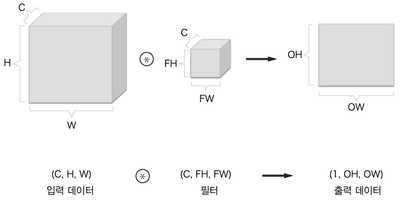

3차원 데이터를 다차원 배열로 나타낼 때는 (채널, 높이, 너비) 순서로 쓴다. 예를 들어 채널 수 C, 높이 H, 너비 W인 데이터의 형상은 (C, H, W)로 쓴다. 필터도 같은 순서로 쓴다. 예를 들어 채널 수 C, 필터 높이 FH, 필터 너비 FW의 경우 (C, FH, FW)로 쓴다.

이 예에서 출력 데이터는 한 장의 특징 맵이다. 한 장의 특징 맵을 다른 말로 하면 채널이 1개인 특징 맵이다. 그럼 합성곱 연산의 출력으로 다수의 채널을 내보내려면 어떻게 해야 할까. 답은 필터(가중치)를 다수 사용하는 것이다. 그림으로는 다음 그림과 같다.

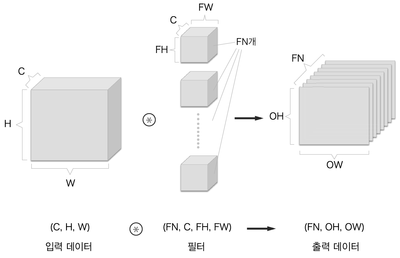

위 그림과 같이 필터를 FN개 적용하면 출력 맵도 FN개가 생성된다. 그리고 그 FN개의 맵을 모으면 (FN, OH, OW)인 블록이 완성된다. 이 완성된 블록을 다음 계층으로 넘기겠다는 것이 CNN의 처리 흐름이다. <br><br>
이상에서 보든 합성곱 연산에서는 필터의 수도 고려해야 한다. 그런 이유로 필터의 가중치 데이터는 4차원 데이터이며 (출력 채널 수, 입력 채널 수, 높이, 너비)순으로 쓴다. 예를 들어 채널 수 3, 크기 5 * 5인 필터가 20개 있다면 (20, 3, 5, 5)로 쓴다.<br><br>
합성곱 연산에도 완전연결 계층과 마찬가지로 편향이 쓰인다. 다음 그림은 위의 그림에 편향을 더한 모습이다.

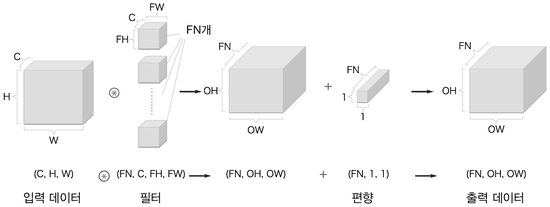

그림에서 보듯 편향은 채널 하나에 값 하나씩으로 구성된다. 이 예에서는 편향의 형상은 (FN, 1, 1)이고, 필터의 출력 결과의 형상은 (FN, OH, OW)이다. 이 두 블록을 더하면 편향의 각 값이 필터의 출력인 (FN, OH, OW) 블록의 대응 채널의 원소 모두에 더해진다. 참고로, 형상이 다른 블록의 덧셈은 넘파이의 브로드캐스트 기능으로 쉽게 구현할 수 있다.

## 7.2.7 배치 처리
신경망 처리에서는 입력 데이터를 한 덩어리로 묶어 배치로 처리하였다. 완전연결 신경망을 구현하면서는 이 방식을 지원하여 처리 효율을 높이고, 미니배치 방식의 학습도 지원하도록 했다.<br><br>
합성곱 연산도 마찬가지로 배치 처리를 지원하고자 한다. 그래서 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장한다. 구체적으로는 데이터를 (데이터 수, 채널 수, 높이, 너비)순으로 저장한다. 데이터가 N개일 때 위의 그림을 배치 처리 한다면 데이터 형태가 다음 그림처럼 되는 것이다.

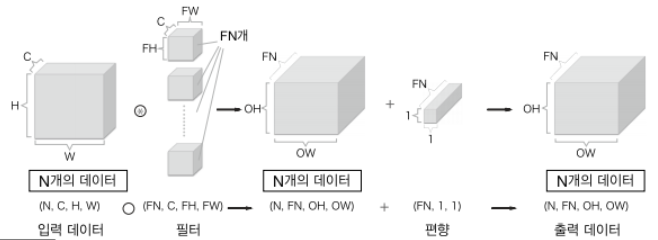

배치 처리 시의 데이터 흐름을 나타낸 그림을 보면 각 데이터의 선두에 배치용 차원을 추가하였다. 이처럼 데이터는 4차원 형상을 가진 채 각 계층을 타고 흐른다. 여기에서 주의할 점으로는 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄진다는 것이다. 즉, N회 분의 처리를 한 번에 수행하는 것이다.

# 7.3 풀링 계층
풀링은 세로, 가로 방향의 공간을 줄이는 연산이다. 예를 들어 다음 그림과 같이 2 X 2 영역을 원소 하나로 집약하여 공간 크기를 줄인다.

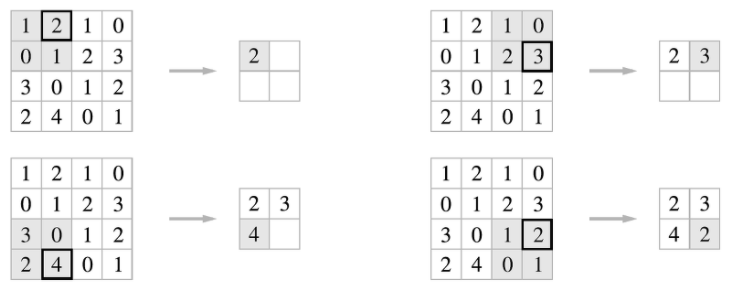

위 그림은 2 X 2 **최대 풀링(Max Pooling)** 을 스트라이드 2로 처리하는 순서이다. 최대 풀링은 최댓값을 구하는 연산으로, '2 X 2'는 대상 영역의 크기를 뜻한다. 즉 2 X 2 최대 풀링은 그림고 ㅏ같이 2 X 2 크기의 영역에서 가장 큰 원소 하나를 꺼낸다. 또, 스트라이드는 이 예에서는 2로 설정했으므로 2 X 2 윈도우가 원소 2칸 간격으로 이동한다. 참고로, 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정하는 것이 보통이다. 예를 들어 윈도우가 3 X 3이면 스트라이드는 3으로, 윈도우가 4 X 4이면 스트라이드를 4로 설정한다.

> 풀링은 최대 풀링 외에도 **평균 풀링 (average pooling)** 등이 있다. 최대 풀링은 대상 영역에서 최댓값을 취하는 연산인 반면, 평균 풀링은 대상 영역의 평균을 계산한다. 이미지 인식 분야에서는 주로 최대 풀링을 사용한다.

## 7.3.1 풀링 계층의 특징
- **학습해야 할 매개변수가 없다.**  
풀링 계층은 합성곱 계층과 달리 학습해야 할 매개변수가 없다. 풀링은 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리이므로 특별히 학습할 것이 없다.<br><br>
- **채널 수가 변하지 않는다.**  
풀링 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 내보낸다. 채널마다 독립적으로 계산하기 때문이다.  <br><br>
- **입력의 변화에 영향을 적게 받는다(강건하다)**  
입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않는다. 예를 들어 다음 그림은 입력 데이터의 차이 (데이터가 오른쪽으로 1칸씩 이동)를 풀링이 흡수해 사라지게 하는 모습을 보여준다.  <br><br>
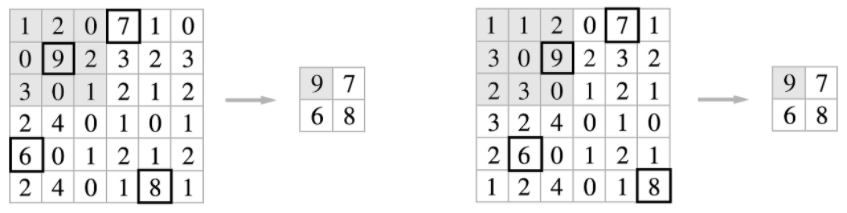

# 7.4 합성곱/풀링 계층 구현하기
합성곱 계층과 풀링 계층은 복잡해 보이지만, 사실 트릭을 사용하면 쉽게 구현할 수 있다. 이번 절에서는 그 트릭을 활용해 문제를 간단히 하면서 합성곱 계층을 구현해본다.

## 7.4.1 4차원 배열
CNN에서 계층 사이를 흐르는 데이터는 4차원이다. 예를 들어 데이터의 형상이 (10, 1, 28, 28)이라면, 이는 높이 28, 너비 28, 채널이 1개인 데이터가 10개라는 이야기이다. 이를 파이썬으로 구현하면 다음과 같다.

In [1]:
import numpy as np

x = np.random.rand(10, 1, 28, 28) # 무작위로 데이터 생성
x.shape

(10, 1, 28, 28)

여기에서 (10개 중) 첫 번째 데이터에 접근하려면 단순히 x[0]이라고 쓴다. 마찬가지로 두 번째 데이터는 x[1] 위치에 있다.

In [2]:
print(x[0].shape)
print(x[1].shape)

(1, 28, 28)
(1, 28, 28)


또, 첫 번째 데이터의 첫 채널의 공간 데이터에 접근하려면 다음과 같이 적는다.

In [3]:
x[0, 0] # 또는 x[0][0]

array([[0.34215113, 0.96242667, 0.5798285 , 0.60346598, 0.62787498,
        0.94193721, 0.14787978, 0.61584031, 0.92227893, 0.84426079,
        0.9151088 , 0.42640553, 0.73860721, 0.19648614, 0.11204093,
        0.99083663, 0.7671303 , 0.55012016, 0.44327645, 0.91184611,
        0.22226545, 0.94818807, 0.00551815, 0.35019587, 0.77271291,
        0.62187674, 0.94254869, 0.59214876],
       [0.99841174, 0.15941091, 0.6835988 , 0.05556305, 0.55203357,
        0.48741119, 0.58161297, 0.21047869, 0.09822363, 0.44037329,
        0.93229253, 0.94407213, 0.78072441, 0.65024271, 0.06480155,
        0.11357976, 0.14900535, 0.14776791, 0.10909086, 0.45027345,
        0.68045574, 0.49976023, 0.95652919, 0.83863045, 0.0213078 ,
        0.13665089, 0.6349758 , 0.83214064],
       [0.92693358, 0.06296486, 0.22263174, 0.88008698, 0.24669247,
        0.86987171, 0.03033329, 0.209029  , 0.26185979, 0.95882602,
        0.44272477, 0.48765759, 0.3558019 , 0.87310591, 0.17141066,
        0.7877673 , 0.8319

이처럼 CNN은 4차원 데이터를 다룬다. 그래서 합성곱 연산의 구현은 복잡할 것 같지만, im2col이라는 트릭이 문제를 단순하게 만들어준다.

## 7.4.2 im2col로 데이터 전개하기 
im2col은 입력 데이터를 필터링 (가중치 계산)하기 좋게 전개하는 함수이다. 다음 그림과 같이 3차원 입력 데이터에 im2col을 적용하면 2차원 행렬로 바꿔준다. (정확히는 배치 안의 데이터 수 까지 포함한 4차원 데이터를 2차원으로 변환한다.)

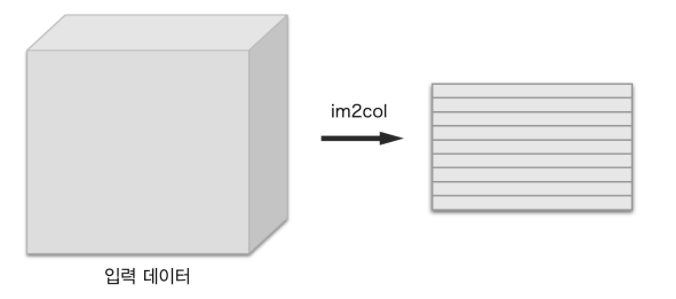

im2col은 필터링 좋게 입력 데이터를 전개한다. 구체적으로는 다음 그림과 같이 입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄로 늘어놓는다. 이 전개를 필터를 적용하는 모든 영역에서 수행하는 게 im2col이다.

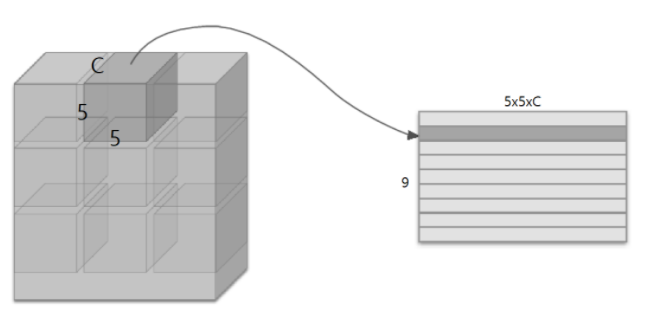

위 그림에서는 보기에 좋게끔 스트라이드를 크게 잡아 필터의 적용 영역이 겹치지 않도록 했지만, 실제 상황에서는 영역이 겹치는 경우가 대부분이다. 필터 적용 영역이 겹치게 되면 im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아진다. 그래서 im2col을 사용해 구현하면 메모리를 더 많이 소비하는 단점이 있다. 하지만 컴퓨터는 큰 행렬을 묶어서 계산하는 데 탁월하다. 예를 들어 행렬 계산 라이브러리 등은 행렬 계산에 고도로 최적화되어 큰 행렬의 곱셈을 빠르게 계산할 수 있다. 그래서 문제를 행렬 계산으로 만들면 선형 대수 라이브러리를 활용해 효율을 높일 수 있다.

> im2col은 'image to column', 즉 '이미지에서 행렬로'라는 뜻이다. 카페와 체이너 등의 딥러닝 프레임워크는 im2col이라는 이름의 함수를 만들어 합성곱 계층을 구현할 때 이용하고 있다.

im2col로 입력 데이터를 전개한 다음에는 합성곱 계층의 필터(가중치)를 1열로 전개하고, 두 행렬의 곱을 계산하면 된다. 이는 완전연결 계층의 Affine 계층에서 한 것과 거의 같다.

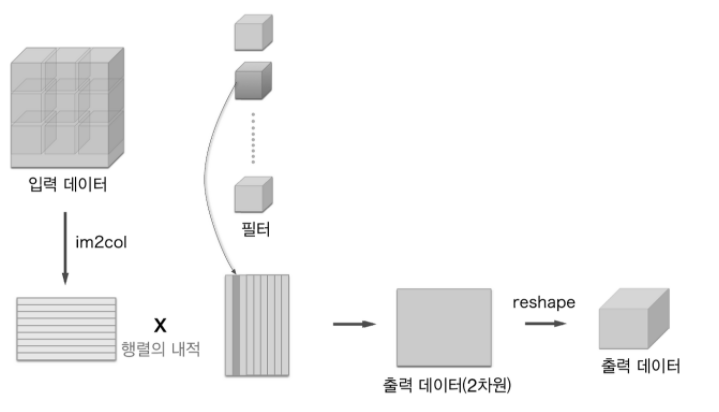

위 그림고 ㅏ같이 im2col 방식으로 출력한 결과는 2차원 행렬이다. CNN은 데이터를 4차원 배열로 저장하므로 2차원인 출력 데이터를 4차원으로 변형한다. 이상이 합성곱 계층의 구현 흐름이다.

## 7.4.3 합성곱 계층 구현하기
im2col 함수의 인터페이스는 다음과 같다.  
```python
im2col(input_data, filter_h, filter_w, stride = 1, pad = 0)
```
- input_data : (데이터 수, 채널 수, 높이, 너비)의 4차원 배열로 이루어진 입력 데이터
- filter_h : 필터의 높이
- filter_w : 필터의 너비
- stride : 스트라이드
- pad : 패딩  

In [5]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride = 1, pad = 0)
print(col2.shape)

(9, 75)
(90, 75)


여기에서는 두 가지 예를 보여주고 있다. 첫 번째는 배치 크기가 1, 채널은 3개, 높이, 너비가 7 X 7의 데이터이고, 두 번째는 배치 크기만 10이고 나머지는 첫 번째와 같다. im2col 함수를 적용한 두 경우 모두 2번째 차원의 원소는 75개이다. 이 값은 필터의 원소 수와 같다. 또한, 배치 크기가 1일 때는 im2col의 결과의 크기가 (9, 75)이고, 10일 때는 그 10배인 (90, 75) 크기의 데이터가 저장된다.

In [6]:
class Convolution:
    def __init__(self, W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = strid
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T     # 필터 전개
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        return out

합성곱 계층은 필터(가중치), 편향, 스트라이드, 패딩을 인수로 받아 초기화한다. 필터는 (FN, C, FH, FW)의 4차원 형상이다. 여기서 FN은 필터 갯수, C는 채널, FH는 필터 높이, FW는 필터 너비이다. <br><br>
```python
col = im2col(x, FH, FW, self.stride, self.pad)
col_W = self.W.reshape(FN, -1).T     # 필터 전개
out = np.dot(col, col_W) + self.b
```
이 부분에서 입력 데이터를 im2col로 전개하고 필터도 reshape를 사용해 2차원 배열로 전개한다. 그리고 이렇게 전개한 두 행렬의 곱을 구한다.<br><br>
필터를 전개하는 부분은 각 필터 블록을 1줄로 펼쳐 세운다. 이때 reshape의 두 번째 인수를 -1로 지정했는데, 이는 reshape이 제공하는 편의 기능이다. reshape에 -1을 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어준다. 앞의 코드에서 (10, 3, 5, 5) 형상을 한 다차원 배열 W의 원소 수는 총 750이면 이 배열에 reshape(10, -1)을 호출했을 때 750개의 원소를 10묶음으로, 즉 형상이 (10, 75)인 배열로 만들어준다.<br><br>
다음으로 forward 구현의 마지막에서는 출력 데이터를 적절한 형상으로 바꿔준다. 이때 넘파이의 transpose 함수를 사용하는데, 이는 다차원 배열의 축 순서를 바꿔주는 함수이다. 따라서 인덱스를 지정하여 축의 순서를 변경한다.<br><br>
합성곱 계층의 역전파는 Affine 계층의 구현과 공통점이 많지만 한 가지 주의할 점은 im2col을 역으로 처리해야 한다. col2im을 사용한다는 점을 제외하면 합성곱 계층의 역전파는 Affine 계층과 동일하다.

## 7.4.4 풀링 계층 구현하기
풀링 계층 구현도 합성곱 계층과 마찬가지로 im2col을 사용해 입력 데이터를 전개한다. 단, 풀링의 경우엔 채널 쪽이 독립적이라는 점이 합성곱 계층 때와 다르다. 구체적으로는 다음 그림과 같이 풀링 적용 영역을 채널마다 독립적으로 전개한다.

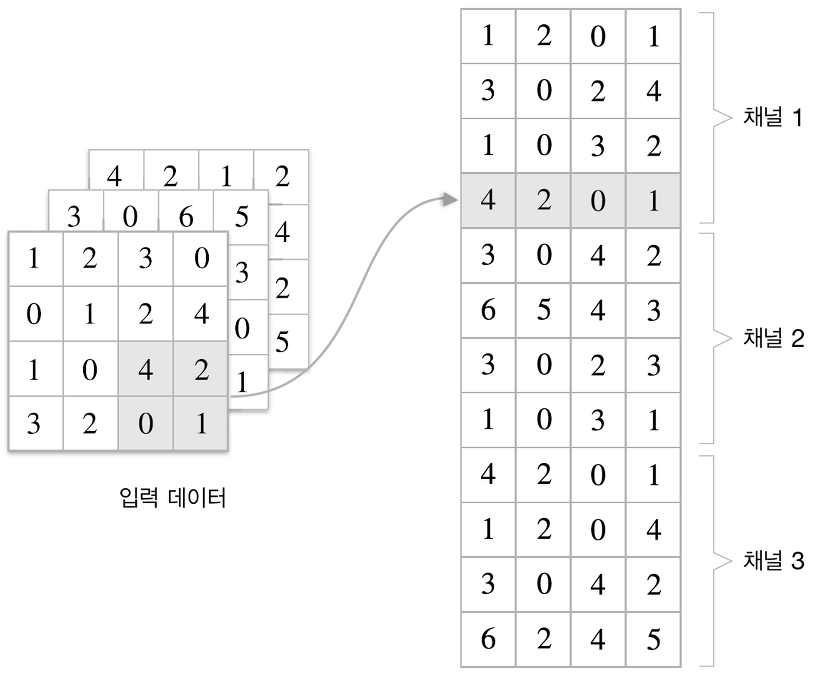

일단 이렇게 전개한 후, 전개한 행렬에서 행별 최댓값을 구하고 적절한 형상으로 성형하기만 하면 된다.

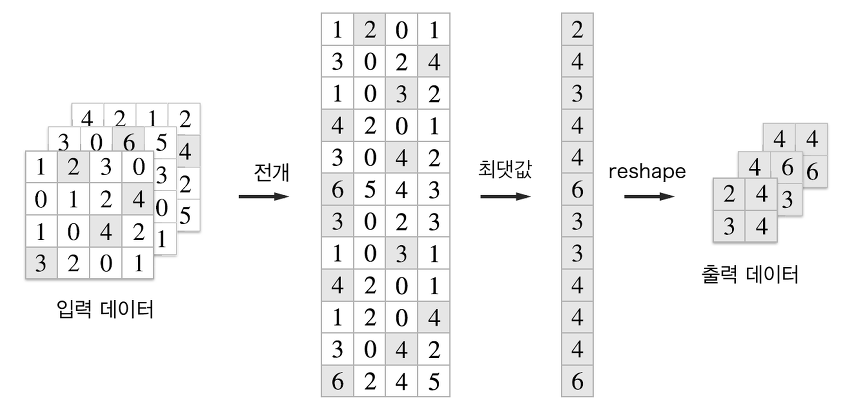

이상이 풀링 계층의 forward 처리 흐름이다. 다음은 이를 파이썬으로 구현한 코드이다.

In [7]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
    
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 전개 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h * self.pool_w)
        
        # 최댓값 (2)
        out = np.max(col, axis = 1)

        # 성형 (3)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out

풀링 계층 구현은 다음의 세 단계로 진행한다.
1. 입력 데이터를 전개한다.
2. 행별 최댓값을 구한다.
3. 적절한 모양으로 성형한다. 

> 최댓값 계산에는 넘파이의 np.max 메서드를 사용할 수 있다. np.max는 인수로 축(axis)을 지정할 수 있는데, 이 인수로 지정한 축마다 최댓값을 구할 수 있다. 가령 np.max(x, axis=1)과 같이 쓰면 입력 x의 1번째 차원의 축마다 최댓값을 구한다.

이상이 풀링 계층의 forward 처리이다. 이 절에서는 선택한 전략을 따라 입력 데이터를 풀링하기 쉬운 형태로 전개해버리면 그 후의 구현은 간단하다.

# 7.5 CNN 구현하기